## Exploratory Data Analysis 

Descriptions can be found at: https://www.kaggle.com/c/microsoft-malware-prediction/data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set(font_scale=2)

In [58]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'category',
        'IsSxsPassiveMode':                                     'category',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'category',
        'AVProductsEnabled':                                    'category',
        'HasTpm':                                               'category',
        'CountryIdentifier':                                    'category',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'category',
        'GeoNameIdentifier':                                    'category',
        'LocaleEnglishNameIdentifier':                          'category',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'category',
        'OsSuite':                                              'category',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'category',
        'AutoSampleOptIn':                                      'category',
        'PuaMode':                                              'category',
        'SMode':                                                'category',
        'IeVerIdentifier':                                      'category',
        'SmartScreen':                                          'category',
        'Firewall':                                             'category',
        'UacLuaenable':                                         'category',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'category',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'category',
        'Census_ProcessorModelIdentifier':                      'category',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'category',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [59]:
%time train = pd.read_csv("data/train.csv", dtype=dtypes)

CPU times: user 2min 39s, sys: 7.24 s, total: 2min 46s
Wall time: 2min 44s


In [5]:
def plot_category_percent_of_target(df, col, numberToShow=20):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    cat_percent = df[[col, 'HasDetections']].groupby(col, as_index=False).mean()
    cat_size = df[col].value_counts().reset_index(drop=False)
    cat_size.columns = [col, 'count']
    cat_percent = cat_percent.merge(cat_size, on=col, how='left')
    cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
    cat_percent = cat_percent.sort_values(by='count', ascending=False)[:numberToShow]
    sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

    for i, p in enumerate(ax.patches):
        ax.annotate('{}'.format(cat_percent['count'].values[i]), (p.get_width(), p.get_y()+0.5), fontsize=15)

    plt.xlabel('% of HasDetections(target)')
    plt.ylabel(col)
    plt.show()
    
def plot_kde_hist_for_numeric(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    sns.kdeplot(df.loc[df['HasDetections'] == 0, col], ax=ax[0], label='NoDetection(0)')
    sns.kdeplot(df.loc[df['HasDetections'] == 1, col], ax=ax[0], label='HasDetection(1)')

    df.loc[df['HasDetections'] == 0, col].hist(ax=ax[1], bins=100)
    df.loc[df['HasDetections'] == 1, col].hist(ax=ax[1], bins=100)

    plt.suptitle(col, fontsize=30)
    ax[0].set_yscale('log')
    ax[0].set_title('KDE plot')
    
    ax[1].set_title('Histogram')
    ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])
    ax[1].set_yscale('log')
    plt.show()

In [6]:
print(train['HasDetections'].value_counts())

0    4462591
1    4458892
Name: HasDetections, dtype: int64


The classes are fairly evenly balanced.

## MachineIdentifier

Individual Machine ID

**Examples:**
 - `0000028988387b115f69f31a3bf04f09`
 - `000007535c3f730efa9ea0b7ef1bd645`
 - `000007905a28d863f6d0d597892cd692`
 

**Unique:** 8,921,483

**Percentage Missing:** 0%

**Decision:** Drop. No predictive value.

## ProductName

Defender state information e.g. `win8defender`

**Examples:**
 - win8defender
 - mse 
 - mseprerelease
 
**Unique:** 6 

**Percentage Missing:** 0%

**Percentage Same:** 98.9%

**Decision**: 
 - Categorize. Threshold categories with less than 54 items into "Other" category.
 

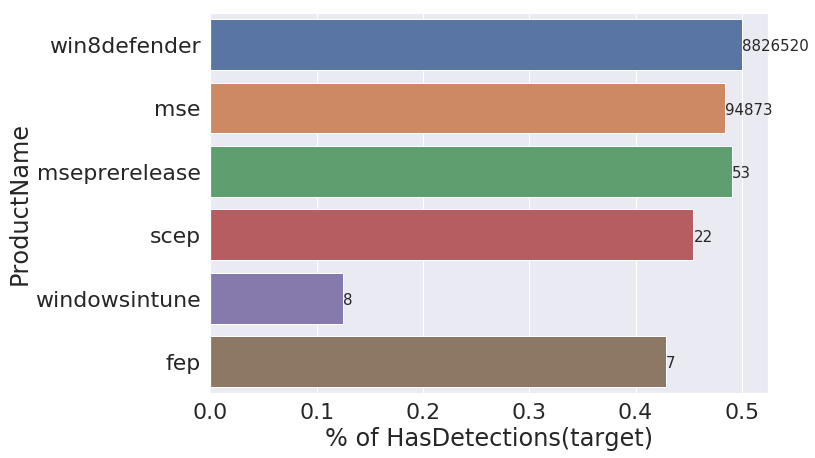

1     win8defender
0              mse
2    mseprerelease
5             scep
3    windowsintune
4              fep
Name: ProductName, dtype: category
Categories (6, object): [mse, win8defender, mseprerelease, windowsintune, fep, scep]
     ProductName  HasDetections    count
1   win8defender       0.499958  8826520
0            mse       0.484448    94873
2  mseprerelease       0.490566       53
5           scep       0.454545       22
3  windowsintune       0.125000        8
4            fep       0.428571        7


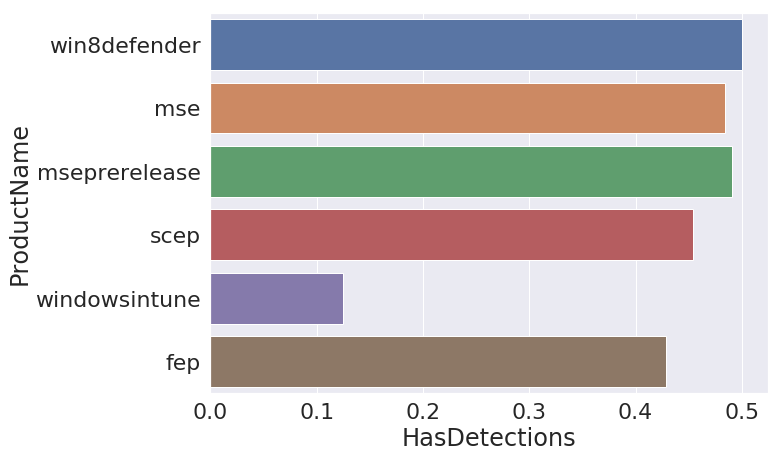

In [7]:
plot_category_percent_of_target(train, 'ProductName')

col = 'ProductName'
df = train

numberToShow = 20
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
cat_percent = df[[col, 'HasDetections']].groupby(col, as_index=False).mean()
cat_size = df[col].value_counts().reset_index(drop=False)
cat_size.columns = [col, 'count']
cat_percent = cat_percent.merge(cat_size, on=col, how='left')


cat_percent['HasDetections'] = cat_percent['HasDetections'].fillna(0)
cat_percent = cat_percent.sort_values(by='count', ascending=False)[:numberToShow]

print(cat_percent[col])
sns.barplot(ax=ax, x='HasDetections', y=col, data=cat_percent, order=cat_percent[col])

print(cat_percent)

## EngineVersion

Defender state information e.g. `1.1.12603.0`

**Examples:**
 - 1.1.15100.1
 - 1.1.14104.0
 - 1.1.9700.0
 
**Unique:** 70 

**Percentage Missing:** 0%

**Percentage Same:** 43.1%

**Decision**: 
 - Categorize. Threshold categories with less than 2,500 items into "Other" category.

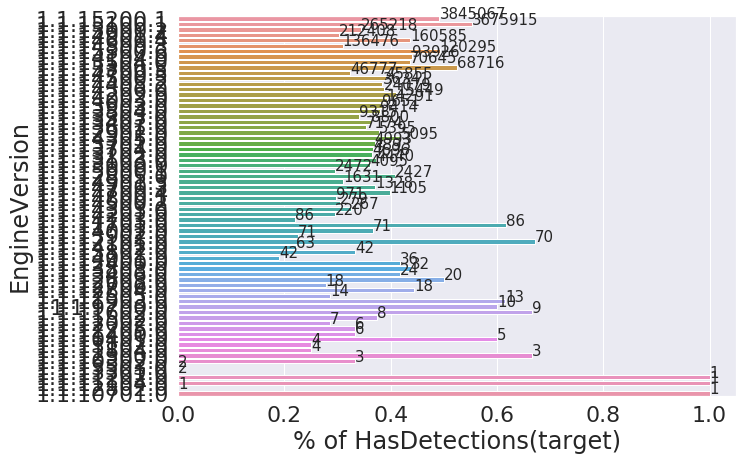

In [8]:
plot_category_percent_of_target(train, 'EngineVersion', numberToShow=70)

## AppVersion

Windows Defender app version information e.g. `4.9.10586.0`

**Examples:**
 - 4.18.1806.18062
 - 4.10.205.0
 - 4.9.10586.962
 
**Unique:** 110

**Percentage Missing:** 0%

**Percentage Same:** 57.6%

**Decision**: 
 - Categorize. Threshold categories with less than 2,500 items into "Other" category.

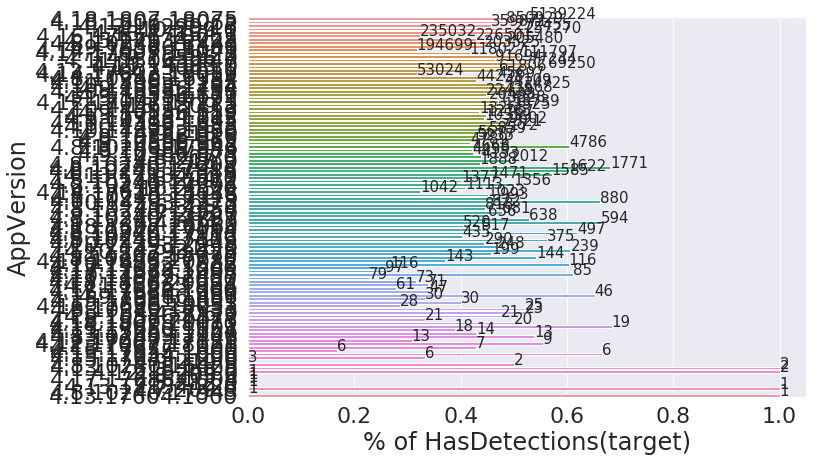

In [9]:
plot_category_percent_of_target(train, 'AppVersion', numberToShow=110)

## AvSigVersion

Windows Defender anti-virus signature version information e.g. `1.217.1014.0`

**Examples:** (Little noisy)
 - `1.2&#x17;3.1144.0`
 - `1.275.1140.0`
 - `0.0.0.0`
 - `1.187.1121.0`
 
**Unique:** 8531

**Percentage Missing:** 0%

**Percentage Same:** 1.1%

**Decision**: 
- Categorize. Threshold categories with less than 2,500 items into "Other" category. 
- Consider investigating if major version is more useful. Should versions be numerical?
- Be careful of noisy category names, might need to clean

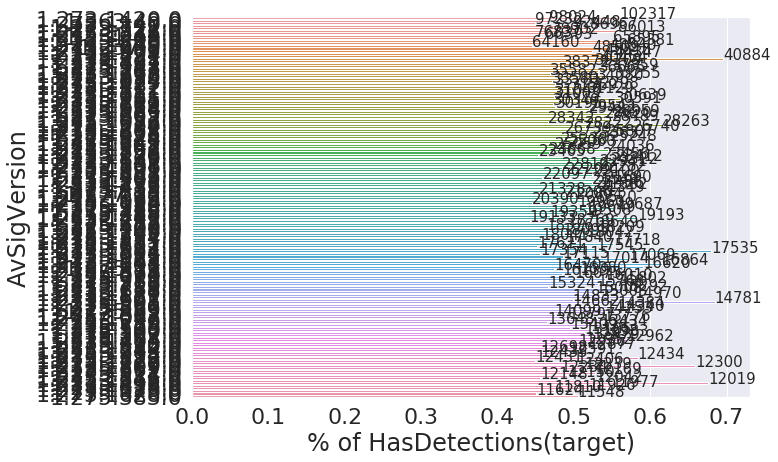

In [10]:
#sorted(list(train['AvSigVersion'].value_counts().keys()))
plot_category_percent_of_target(train, 'AvSigVersion', numberToShow=150)

## IsBeta

Whether or not Windows Defender is in beta. e.g. `true`

**Examples:** 
 - `true`
 - `false`
 
**Unique:** 2

**Percentage Missing:** 0%

**Percentage Same:** 99.999249%

**Decision**: Drop.

In [11]:
print("Number of True", len(train[train['IsBeta'] != 0]))
print("Number of False", len(train[train['IsBeta'] == 0]))

Number of True 67
Number of False 8921416


## RtpStateBitfield

*No description available.*

**Examples:** 
 - `7.0`
 - `0.0`
 - `8.0`
 
**Unique:** 7

**Percentage Missing:** 0.36%

**Percentage Same:** 97.0%

**Decision**: 
 - Replace NAs
 - Categorize

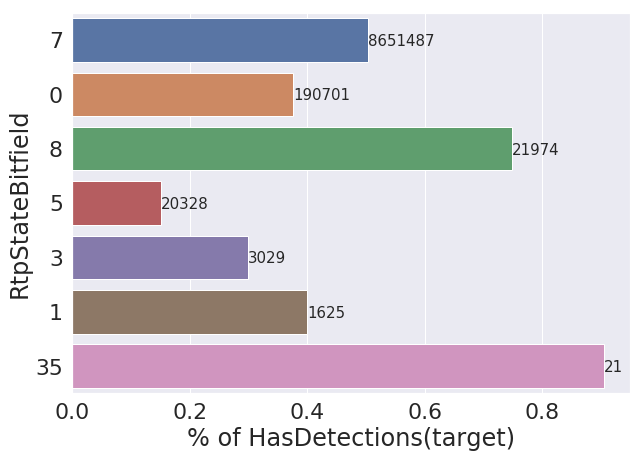

In [12]:
plot_category_percent_of_target(train, 'RtpStateBitfield')

## IsSxsPassiveMode

*No description available.*

**Examples:** 
 - 0
 - 1
 
**Unique:** 2

**Percentage Missing:** 0.0%

**Percentage Same:** 98.3%

**Decision**: 
 - Categorize 

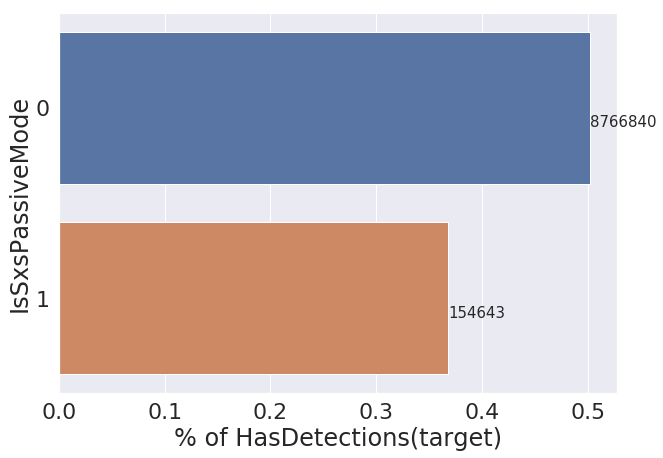

In [13]:
plot_category_percent_of_target(train, 'IsSxsPassiveMode')

## DefaultBrowsersIdentifier

ID for the machine's default browser

**Examples:** 
 - 1.0
 - 228.0
 - 1572.0
 
**Unique:** 1,730

**Percentage Missing:** 95.1%

**Percentage Same:** 95.1%

**Decision**: 
 - `.fillna(-1)`
 - Check if all test categories are represented in training. If so:
   - Categorize. Threshold categories with less than 1,000 items into "Other" category. 


In [14]:
df[col].dtype

CategoricalDtype(categories=['mse', 'win8defender', 'mseprerelease', 'windowsintune',
                  'fep', 'scep'],
                 ordered=False)

/home/josh/anaconda3/envs/nlpenv/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/josh/anaconda3/envs/nlpenv/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


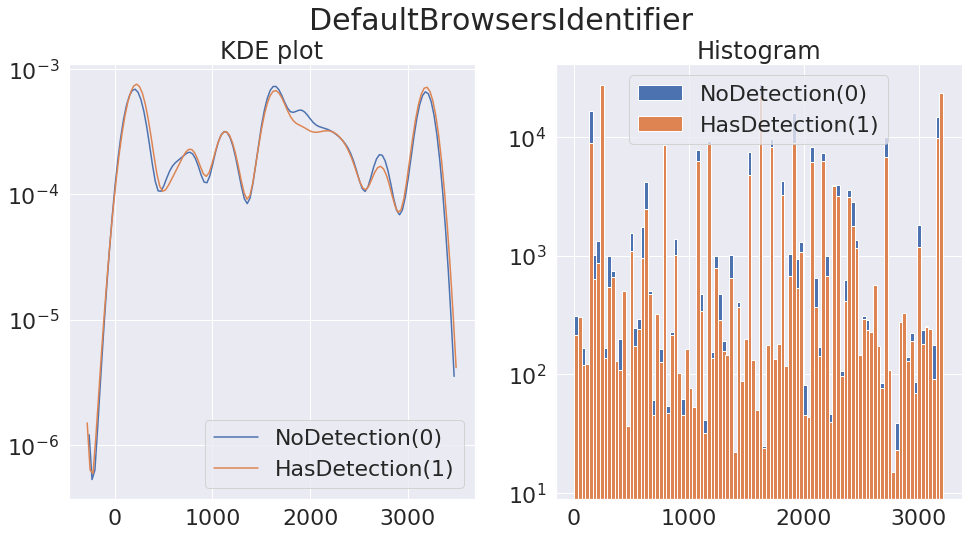

In [15]:
plot_kde_hist_for_numeric(train, 'DefaultBrowsersIdentifier')

## AVProductStatesIdentifier

ID for the specific configuration of a user's antivirus software
 
**Examples:** 
 - 16.0
 - 401.0
 - 70490.0
 
**Unique:** 28,970

**Percentage Missing:** 0.4%

**Percentage Same:** 65.29%

**Decision**: 
 - `.fillna(-1)`
 - Check if all test categories are represented in training. If so:
   - Categorize. Threshold categories with less than 1,000 items into "Other" category. 
 - Otherwise, does this need to be a float rather than an `int`? 

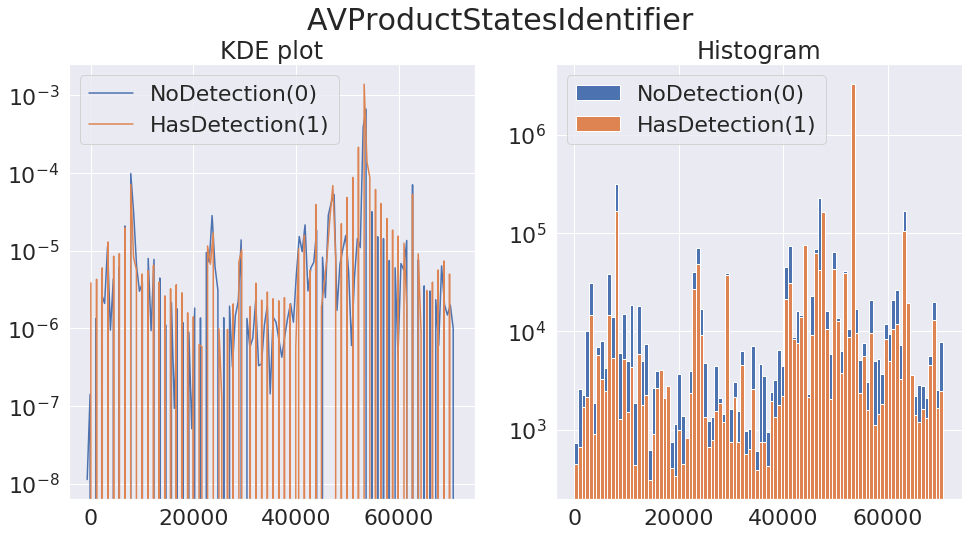

In [16]:
plot_kde_hist_for_numeric(train, 'AVProductStatesIdentifier')

## AVProductsInstalled

*No description available.*
 
**Examples:** 
 - 0
 - 1
 - 5
 
**Unique:** 8

**Percentage Missing:** 0.4%

**Percentage Same:** 65%

**Decision**: 
 - Categorize. Threshold categories with less than 1,000 items into "Other" category.  

In [17]:
sorted(list(train['AVProductsInstalled'].value_counts().keys()))

['0', '1', '2', '3', '4', '5', '6', '7']

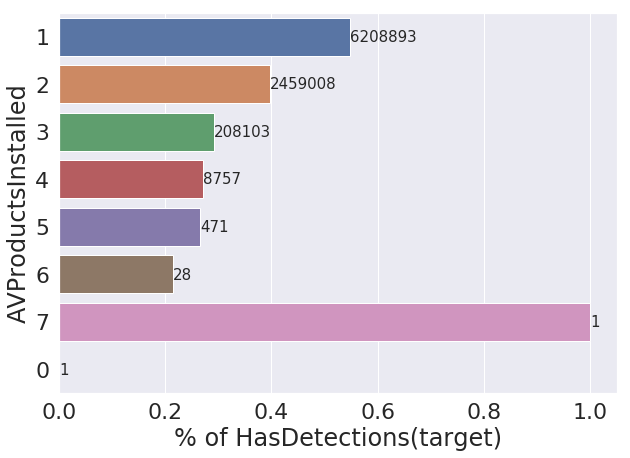

In [18]:
plot_category_percent_of_target(train, 'AVProductsInstalled')

## AVProductsEnabled

*No description available.*
 
**Examples:** 
 - 0.0
 - 4.0
 - 6.0
 
**Unique:** 6 

**Percentage Missing:** 0.4%

**Percentage Same:** 97%

**Decision**: 
 - Categorize. Threshold categories with less than 1,000 items into "Other" category.  


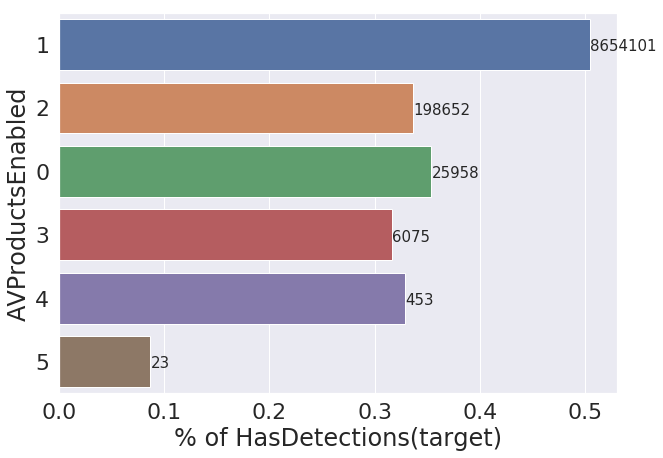

In [19]:
plot_category_percent_of_target(train, 'AVProductsEnabled')

## HasTpm

True if machine has tpm. (Trusted Platform Module)
 
**Examples:** 
 - 0
 - 1
 
**Unique:** 2 

**Percentage Missing:** 0%

**Percentage Same:** 98.8%

**Decision**: 
 - Categorize.


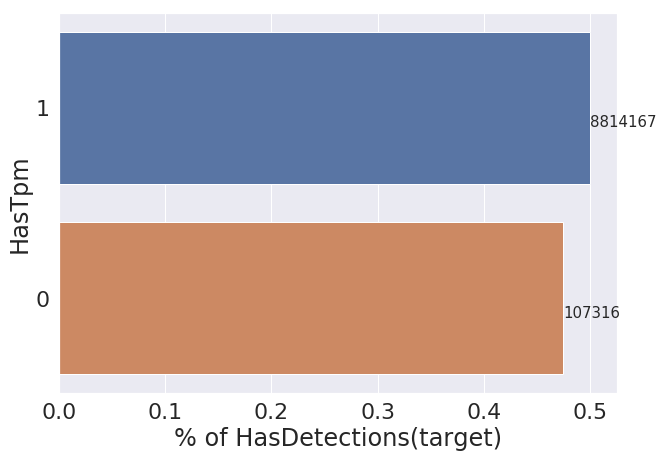

In [26]:
plot_category_percent_of_target(train, 'HasTpm')

## CountryIdentifier

ID for the country the machine is located in.
 
**Examples:** 
 - 1
 - 50
 - 222
 
**Unique:** 2 

**Percentage Missing:** 0%

**Percentage Same:** 4.45%

**Decision**: 
 - All categories are present and reasonably well represented so we'll just categorize.

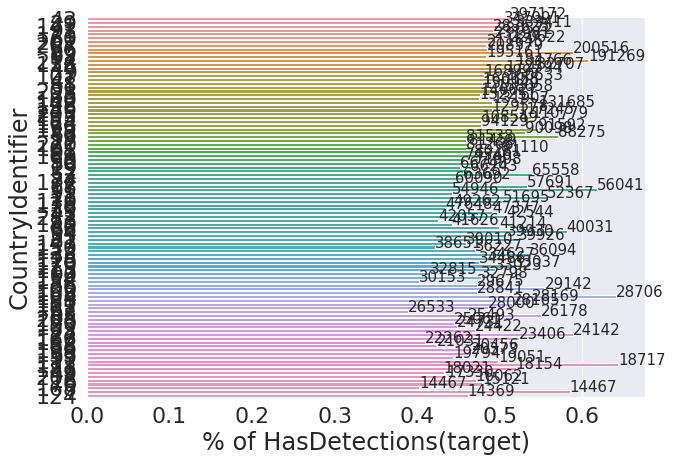

In [38]:
plot_category_percent_of_target(train, 'CountryIdentifier', 100)

## CityIdentifier

ID for the city the machine is located in.

**Examples:** 
 - 20805
 - 10222
 - 61668
 
**Unique:** 107,366  *(That's more than there are cities in the world...)*

**Percentage Missing:** 3.65%

**Percentage Same:** 3.65%

**Decision**: 
 - I think there are too many cities for us to work with. Let's drop this.

## OrganizationIdentifier

ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries

**Examples:** 
 - 1.0
 - 25.0
 - 52.0
 
**Unique:** 49

**Percentage Missing:** 30.8%

**Percentage Same:** 47.0%

**Decision**: 
 - Some values (9.0, 13.0, 24.0) are missing.
 - fillna
 - Confirm values are also not present in test set
     - Categorize. Threshold categories with less than 1,000 items into "Other" category.  

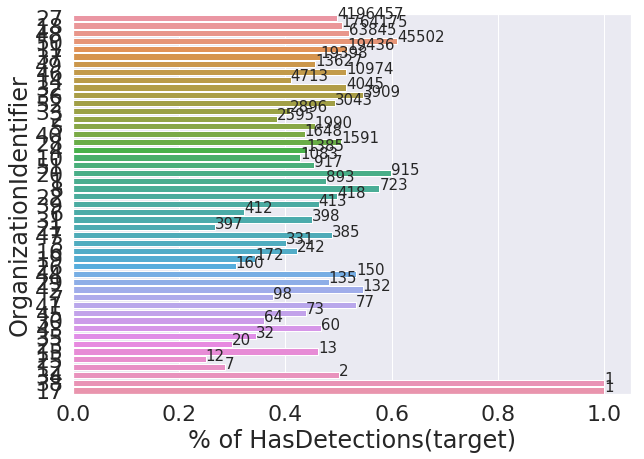

In [7]:
plot_category_percent_of_target(train, 'OrganizationIdentifier', 49)

## GeoNameIdentifier

ID for the geographic region a machine is located in

**Examples:** 
 - 27 
 - 14
 - 50

**Unique:** 292

**Percentage Missing:** 0.002%

**Percentage Same:** 17.1%

**Decision**: 
 - fillna
 - Confirm values are also not present in test set
     - Categorize. Threshold categories with less than 1,000 items into "Other" category.  
     


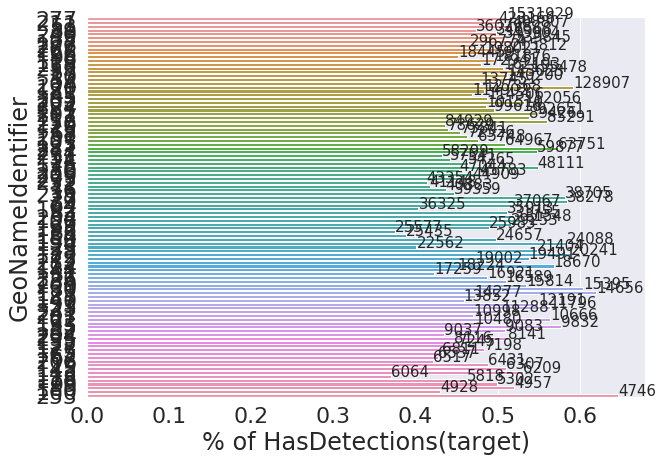

In [12]:
plot_category_percent_of_target(train, 'GeoNameIdentifier', 100)

## LocaleEnglishNameIdentifier

English name of Locale ID of the current user.

**Examples:** 
 -  75
 - 171
 - 88

**Unique:** 252

**Percentage Missing:** 0%

**Percentage Same:** 23.5%

**Decision**: 
 - Confirm values are also not present in test set
     - Categorize. Threshold categories with less than 1,000 items into "Other" category.  
     

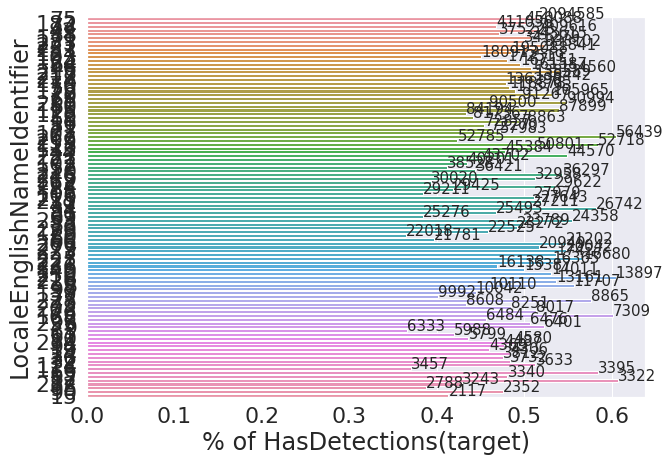

In [8]:
plot_category_percent_of_target(train, 'LocaleEnglishNameIdentifier', 100)

## Platform

Calculates platform name (of OS related properties and processor property)


**Examples:** 
 - windows10
 - windows8
 - windows2016

**Unique:** 4

**Percentage Missing:** 0%

**Percentage Same:** 96.6%

**Decision**: 
 - Categorize. Seems completely clean.
   
     

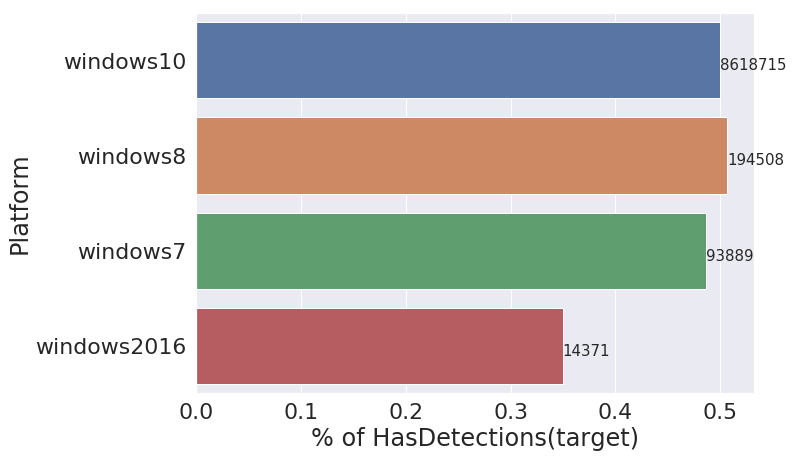

In [11]:
plot_category_percent_of_target(train, 'Platform')

## Processor

This is the process architecture of the installed operating system.


**Examples:** 
 - x64
 - x86
 - arm64

**Unique:** 3

**Percentage Missing:** 0%

**Percentage Same:** 90.9%

**Decision**: 
 - `arm64` has super low detections. Might be worth it to manually mark all `arm64` as no detections.
 - Categorize. 


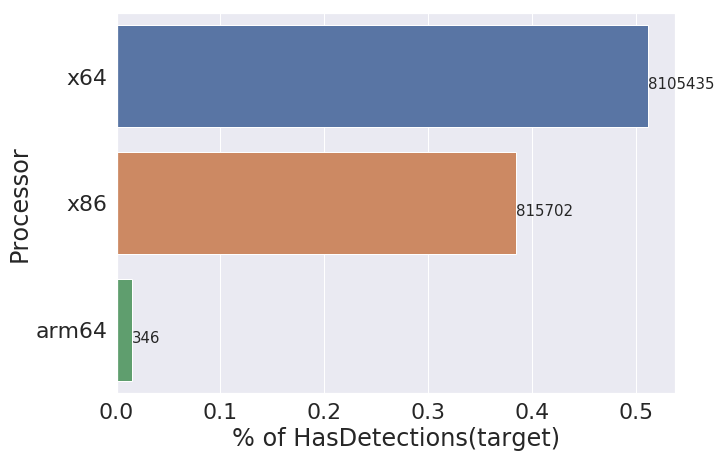

In [12]:
plot_category_percent_of_target(train, 'Processor')

## OsVer

Version of the current operating system.


**Examples:** 
 - 10.0.0.0
 - 6.3.0.0
 - 6.1.1.0

**Unique:** 58

**Percentage Missing:** 0%

**Percentage Same:** 96.8%

**Decision**: 
 - Categorize. Threshold categories with less than 1,000 items into "Other" category.  

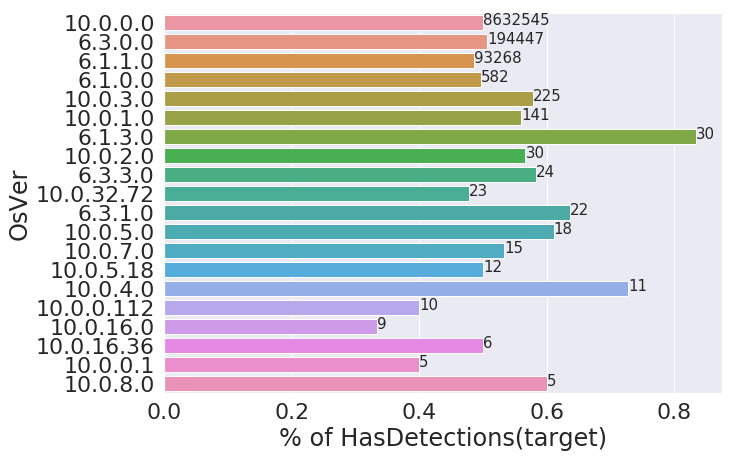

In [13]:
plot_category_percent_of_target(train, 'OsVer')

## OsBuild

Build of the current operating system.


**Examples:** 
 - 9600
 - 17134
 - 7601

**Unique:** 76

**Percentage Missing:** 0%

**Percentage Same:** 43.9%

**Decision**: 
 - Categorize. Threshold categories with less than 10,000 items into "Other" category.  

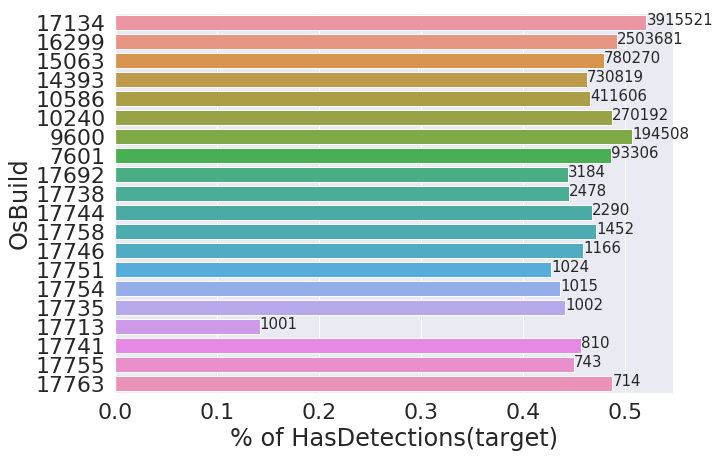

In [20]:
plot_category_percent_of_target(train, 'OsBuild')

## OsSuite

Product suite mask for the current operating system.

**Examples:** 
 - 768
 - 16
 - 307

**Unique:** 14

**Percentage Missing:** 0%

**Percentage Same:** 62.3%

**Decision**: 
 - Categorize. Threshold categories with less than 10,000 items into "Other" category. 


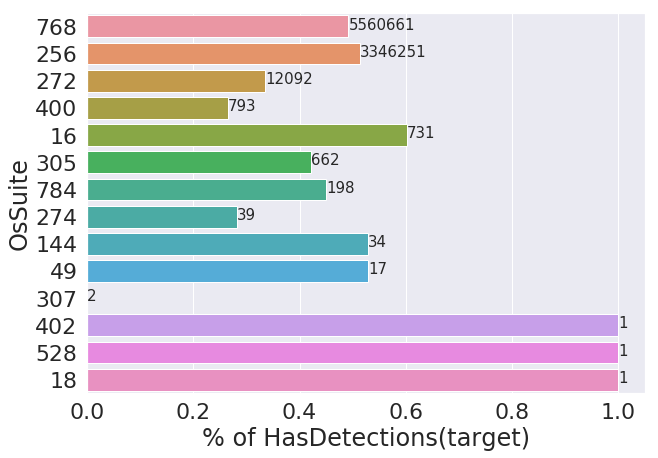

In [25]:
plot_category_percent_of_target(train, 'OsSuite')

## OsPlatformSubRelease

Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)

**Examples:** 
 - rs4
 - windows8.1
 - prers5

**Unique:** 9

**Percentage Missing:** 0%

**Percentage Same:** 43.9%

**Decision**: 
 - Categorize.


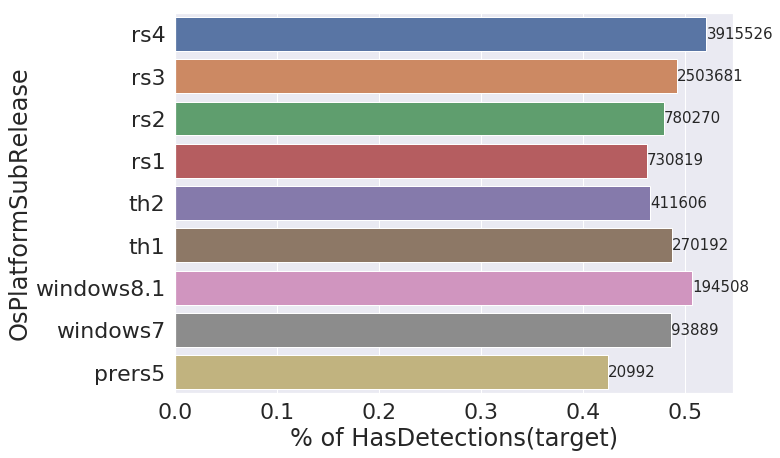

In [27]:
plot_category_percent_of_target(train, 'OsPlatformSubRelease')

## OsBuildLab

Build lab that generated the current OS. Example: `9600.17630.amd64fre.winblue_r7.150109-2022`

**Examples:** 
 - 10240.16412.x86fre.th1.150729-1800
 - 17728.1000.amd64fre.rs5_release.180727-1721
 - 7601.18205.x86fre.win7sp1_gdr.130708-1532

**Unique:** 663

**Percentage Missing:** 0.0002%

**Percentage Same:** 41.0%

**Decision**: 
 - Check if any categories exist in train that don't exist in test
 - Categorize. Threshold categories with less than 2,500 items into "Other" category.


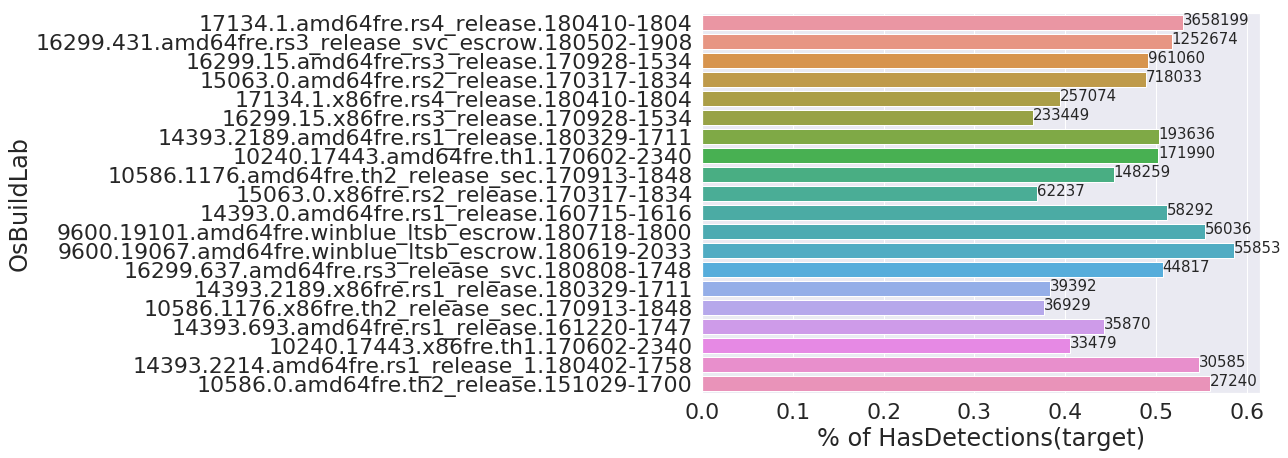

In [45]:
plot_category_percent_of_target(train, 'OsBuildLab')

## SkuEdition

The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.

**Examples:** 
 - Home
 - Pro
 - Invalid

**Unique:** 8

**Percentage Missing:** 0%

**Percentage Same:** 61.8%

**Decision**: 
 - Categorize


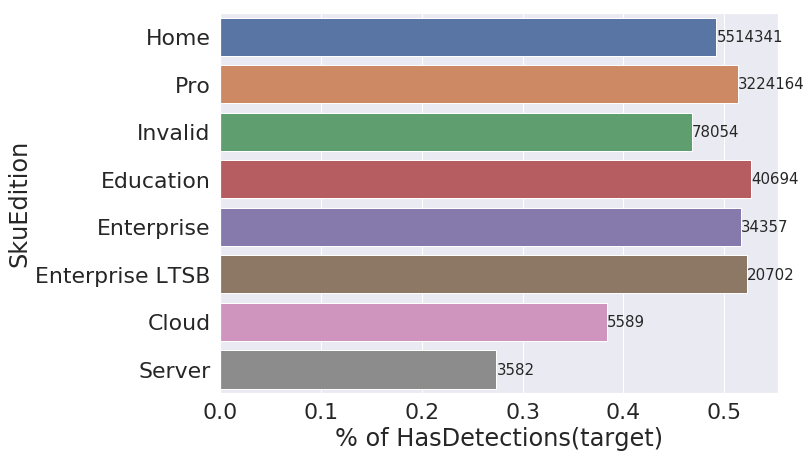

In [47]:
plot_category_percent_of_target(train, 'SkuEdition')

## IsProtected

This is a calculated field derived from the Spynet Report's AV Products field. Returns: 

 1. TRUE if there is at least one active and up-to-date antivirus product running on this machine. 
 2. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. 
 3. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.

**Examples:** 
 - 0
 - 1

**Unique:** 2

**Percentage Missing:** 0.4% 

**Percentage Same:** 94.2%

**Decision**: 
 - Fillna
 - Categorize


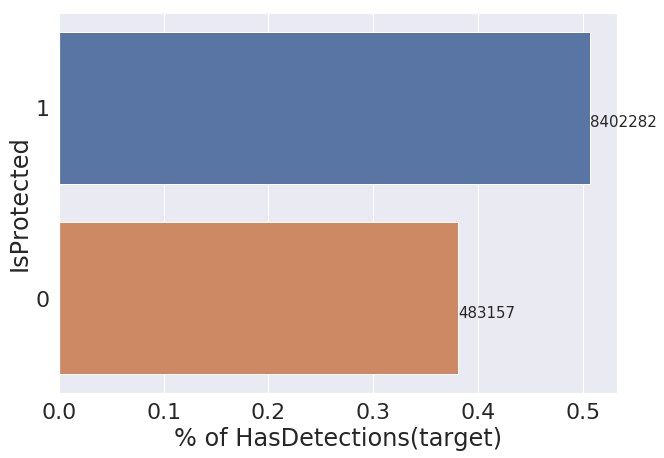

In [51]:
plot_category_percent_of_target(train, 'IsProtected')

## AutoSampleOptIn

This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+


**Examples:** 
 - 0
 - 1

**Unique:** 2

**Percentage Missing:** 0%

**Percentage Same:** 99.99%

**Decision**: 
 - Drop. It's almost all the same.



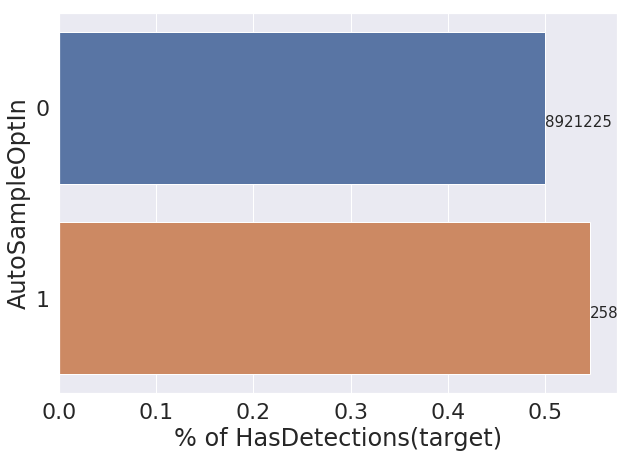

In [9]:
plot_category_percent_of_target(train, 'AutoSampleOptIn')

## PuaMode

Pua (Potentially Unwanted Application) Enabled mode from the Windows Defender service.


**Examples:** 
 - audit
 - on

**Unique:** 2

**Percentage Missing:** 99.97%

**Percentage Same:** 99.97%

**Decision**: 
 - Drop. It's almost all the same.


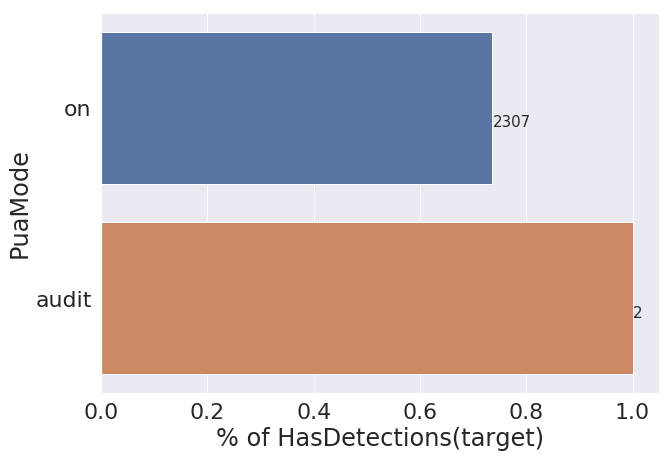

In [10]:
plot_category_percent_of_target(train, 'PuaMode')

## SMode

This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed


**Examples:** 
 - 0
 - 1

**Unique:** 2

**Percentage Missing:** 6.0%

**Percentage Same:** 93.9%

**Decision**: 
 - fillna
 - Categorize


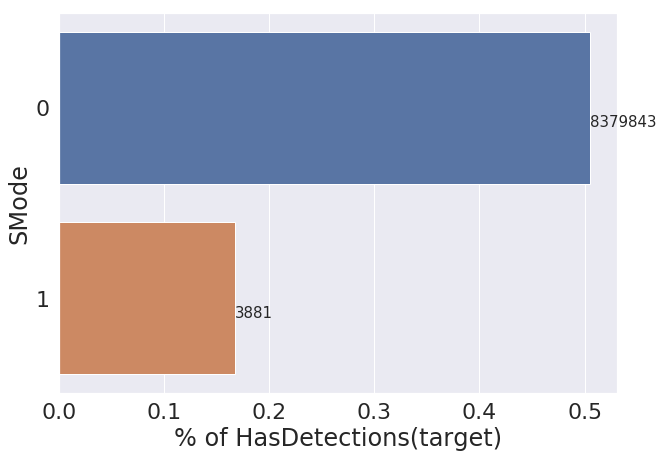

In [15]:
plot_category_percent_of_target(train, 'SMode')

## IeVerIdentifier

*No description available.*

**Examples:** 
 - 111
 - 98
 - 74

**Unique:** 303

**Percentage Missing:** 0.66%

**Percentage Same:** 43.6%

**Decision**: 
 - fillna
 - Check if all test categories exist in training set.
     - Categorize. Threshold at 1,000

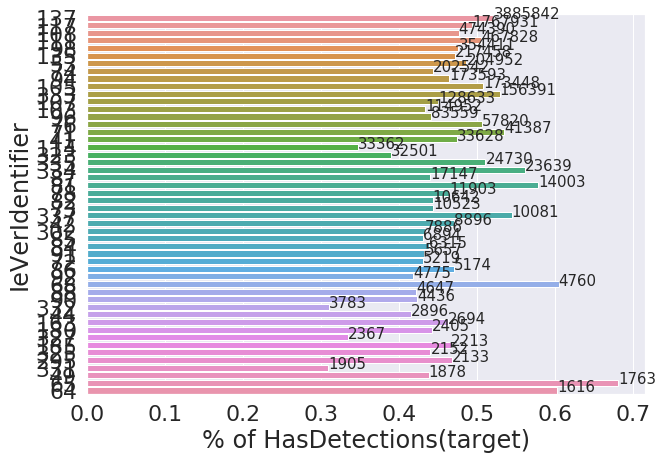

In [34]:
plot_category_percent_of_target(train, 'IeVerIdentifier', 50)

## SmartScreen

This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

**Examples:** 
 - RequiresAdmin
 - ExistsNotSet
 - Off

**Unique:** 21

**Percentage Missing:** 35.6%

**Percentage Same:** 48.4%

**Decision**: 
 - fillna
 - Combine `Off`, `off`, `OFF`
 - Categorize. Threshold categories with less than 1,000 items into "Other" category. 

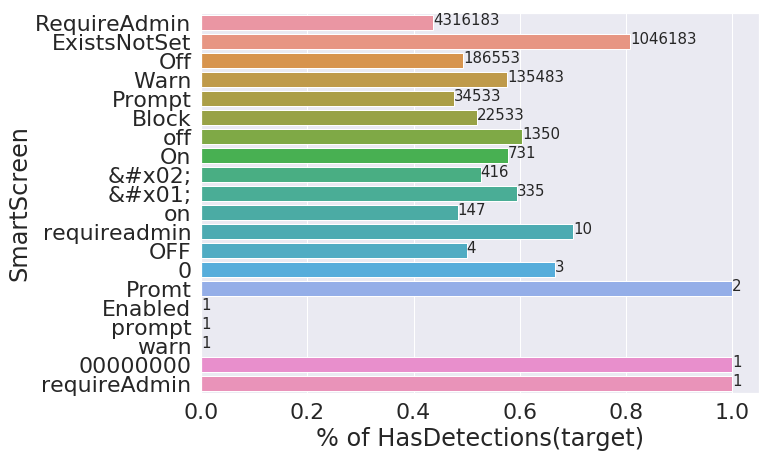

In [35]:
plot_category_percent_of_target(train, 'SmartScreen')

## Firewall

This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.

**Examples:** 
 - 1
 - 0

**Unique:** 2

**Percentage Missing:** 1.02%

**Percentage Same:** 96.9%

**Decision**: 
 - fillna
 - Categorize.

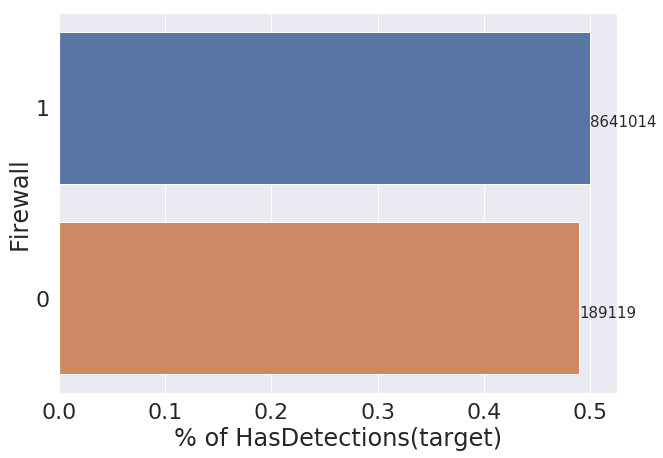

In [7]:
plot_category_percent_of_target(train, 'Firewall')

## UacLuaenable

This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.

**Examples:** 
 - 1.0
 - 0.0
 - 48.0

**Unique:** 11

**Percentage Missing:** 0.12%

**Percentage Same:** 99.3%

**Decision**: 
 - fillna
 - Categorize. Threshold categories with less than 1,000 items into "Other" category. 

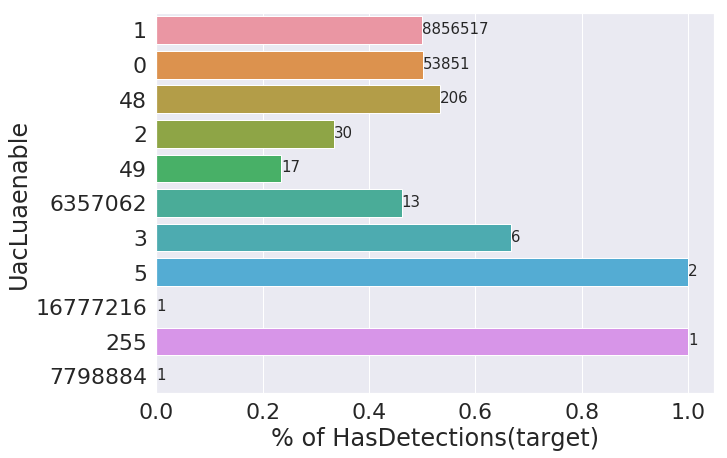

In [11]:
plot_category_percent_of_target(train, 'UacLuaenable')

## Census_MDC2FormFactor

A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)

**Examples:** 
 - Notebook
 - Desktop
 - PCOther

**Unique:** 13

**Percentage Missing:** 0%

**Percentage Same:** 64.2%

**Decision**: 
 - fillna
 - Categorize. Threshold categories with less than 1,000 items into "Other" category. 

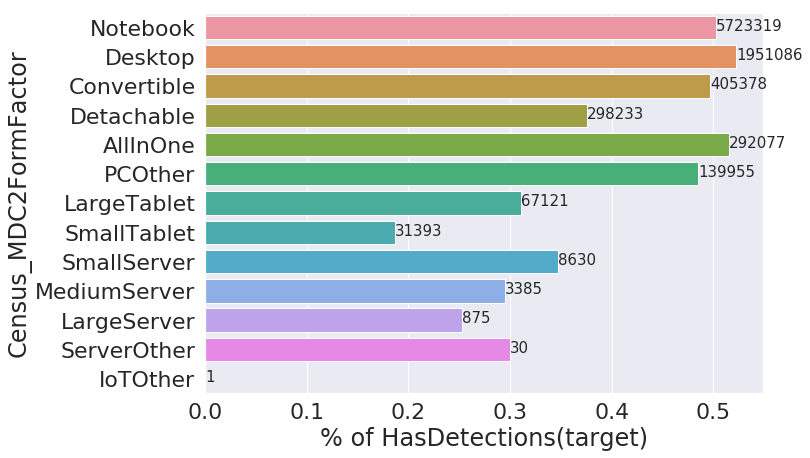

In [12]:
plot_category_percent_of_target(train, 'Census_MDC2FormFactor')

## Census_DeviceFamily

AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone

**Examples:** 
 - Windows.Desktop
 - Windows.Server
 - Windows

**Unique:** 3

**Percentage Missing:** 0%

**Percentage Same:** 99.8%

**Decision**: 
 - Categorize. Threshold categories with less than 15,000 items into "Other" category. 

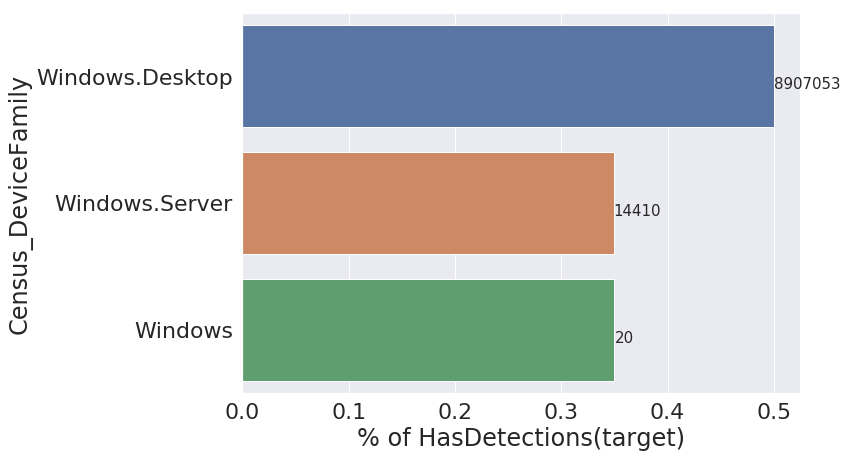

In [13]:
plot_category_percent_of_target(train, 'Census_DeviceFamily')

## Census_OEMNameIdentifier

*No description available.*

**Examples:** 
 - 2668
 - 4908
 - 3800

**Unique:** 2564

**Percentage Missing:** 1.1%

**Percentage Same:** 14.4%

**Decision**: 
 - fillna
 - Check if any categories in test are not found in train
 - Categorize. Threshold categories with less than 1,000 items into "Other" category. 

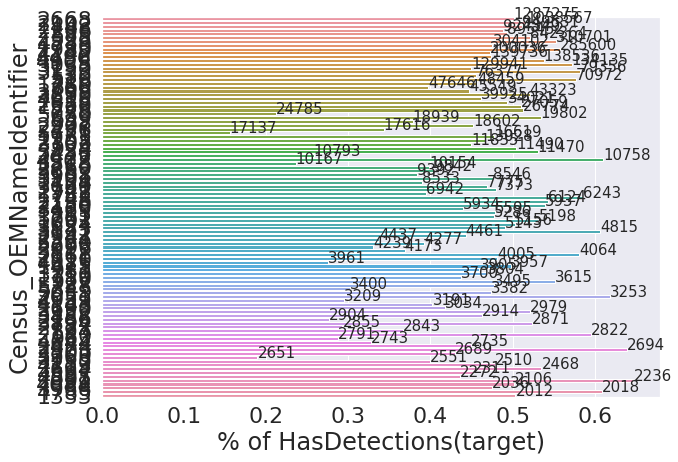

In [19]:
#train['Census_OEMNameIdentifier'].value_counts()
plot_category_percent_of_target(train, 'Census_OEMNameIdentifier', 100)

## Census_ProcessorCoreCount

Number of logical cores in the processor

**Examples:** 
 - 2.0
 - 4.0
 - 28.0

**Unique:** 45

**Percentage Missing:** 0.46%

**Percentage Same:** 60.9%

**Decision**: 
 - fillna?? What's a good value to fill? median/mean?
 - Cast to int?

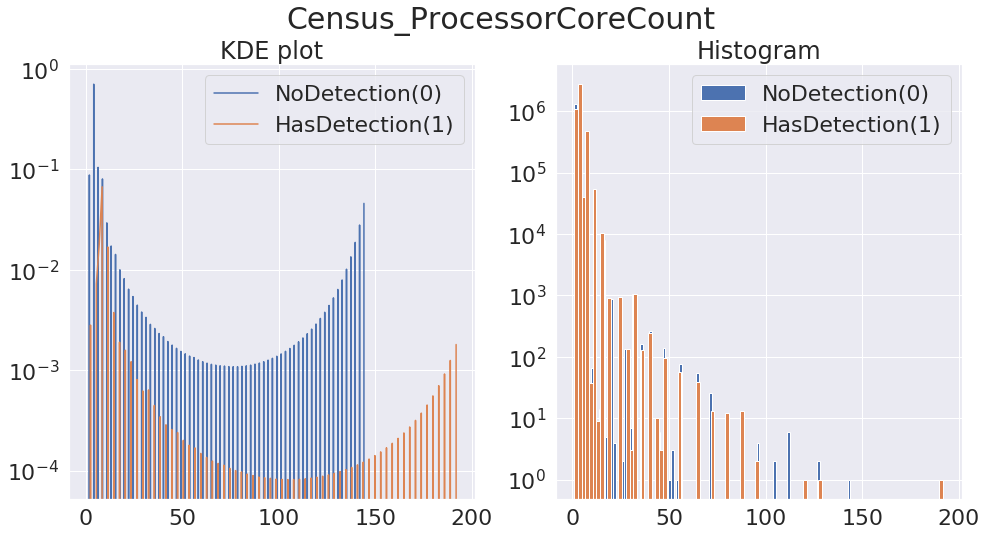

In [25]:
plot_kde_hist_for_numeric(train, 'Census_ProcessorCoreCount')

## Census_ProcessorManufacturerIdentifier

*No description Available*

**Examples:** 
 - 5
 - 7
 - 10

**Unique:** 7

**Percentage Missing:** 0.46%

**Percentage Same:** 87.9%

**Decision**: 
 - fillna
 - Categorize. Threshold < 200? I don't really want to merge 10 and 3...

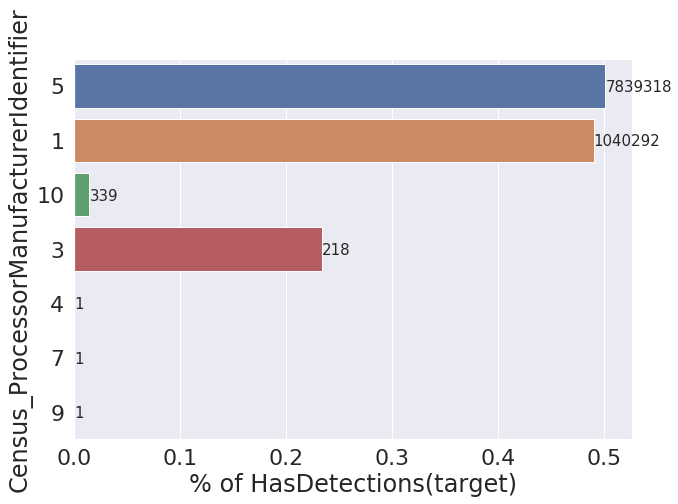

In [29]:
plot_category_percent_of_target(train, 'Census_ProcessorManufacturerIdentifier')

## Census_ProcessorModelIdentifier

*No description available.*

**Examples:** 
 - 3026
 - 2382
 - 2524

**Unique:** 2,583

**Percentage Missing:** 0.46%

**Percentage Same:** 3.24%

**Decision**: 
 - fillna
 - Categorize, threshold under 100

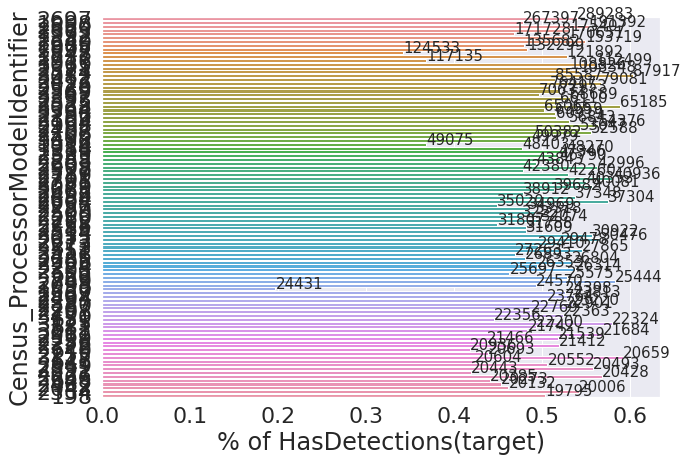

In [29]:
plot_category_percent_of_target(train, 'Census_ProcessorModelIdentifier', 100)

## Census_ProcessorClass

A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated.

**Examples:** 
 - high
 - medium
 - low

**Unique:** 3

**Percentage Missing:** 99.589407%

**Percentage Same:** 99.589407%

**Decision**: 
 - fillna
 - Categorize

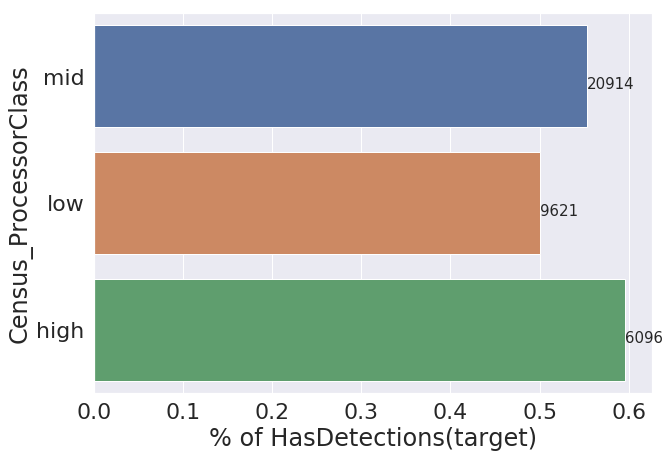

In [31]:
plot_category_percent_of_target(train, 'Census_ProcessorClass')

## Census_PrimaryDiskTotalCapacity

Amount of disk space on primary disk of the machine in MB

**Examples:** 
 - 476940
 - 305245
 - 76319

**Unique:** 5,735

**Percentage Missing:** 0.59%

**Percentage Same:** 31.85%

**Decision**: 
 - fillna
 - Can we bucket these somehow?
 - Cast to int?

In [47]:
#list(train['Census_PrimaryDiskTotalCapacity'].value_counts())[-6000:]

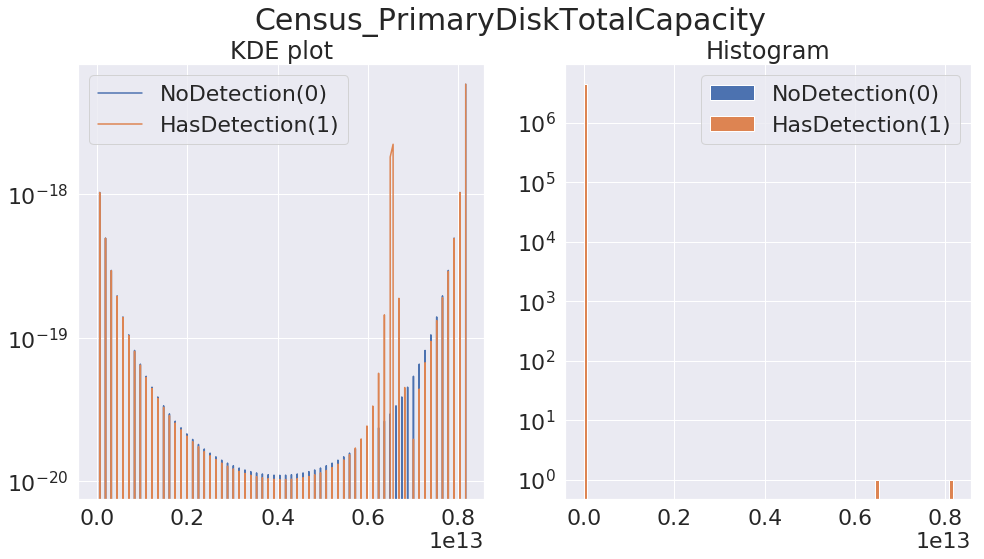

In [36]:
plot_kde_hist_for_numeric(train, 'Census_PrimaryDiskTotalCapacity')

## Census_PrimaryDiskTypeName

Friendly name of Primary Disk Type - HDD or SSD

**Examples:** 
 - SDD
 - HDD
 - UNKNOWN

**Unique:** 4

**Percentage Missing:** 0.14%

**Percentage Same:** 65.1%

**Decision**: 
 - fillna
 - Combine na, UNKNOWN and Unspecified


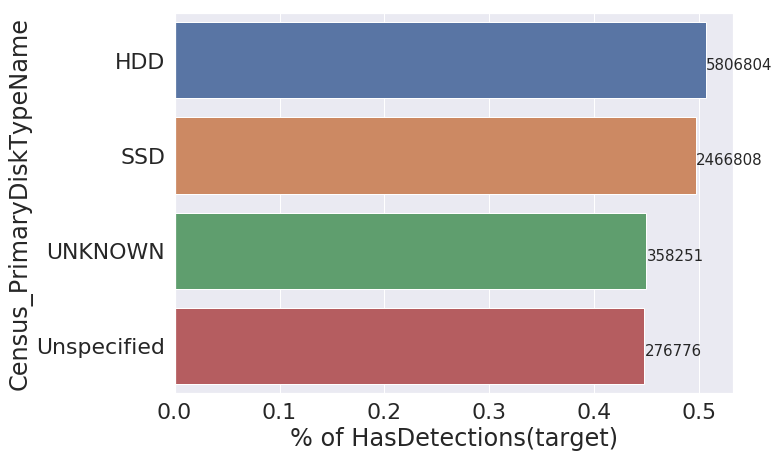

In [48]:
plot_category_percent_of_target(train, 'Census_PrimaryDiskTypeName')

## Census_SystemVolumeTotalCapacity

The size of the partition that the System volume is installed on in MB

**Examples:** 
 - 953253.0
 - 102401.0
 - 476438.0

**Unique:** 536,848

**Percentage Missing:** 0.59%

**Percentage Same:** 0.59%

**Decision**: 
 - fillna
 - Cast to int?
 

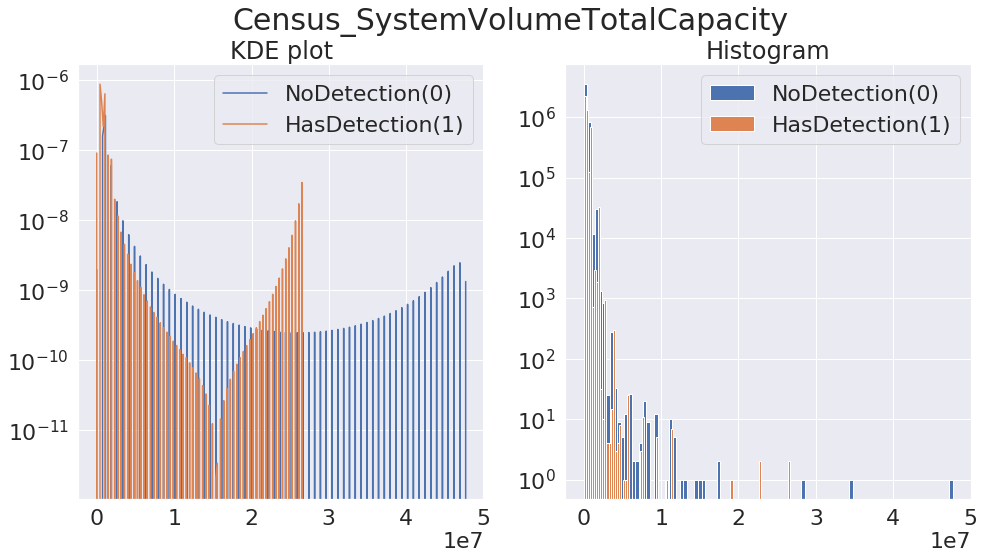

In [50]:
plot_kde_hist_for_numeric(train, 'Census_SystemVolumeTotalCapacity')

## Census_HasOpticalDiskDrive

True indicates that the machine has an optical disk drive (CD/DVD)
 
 **Examples:** 
 - 1
 - 0

**Unique:** 2

**Percentage Missing:** 0%

**Percentage Same:** 92.3%

**Decision**: 
 - Categorize

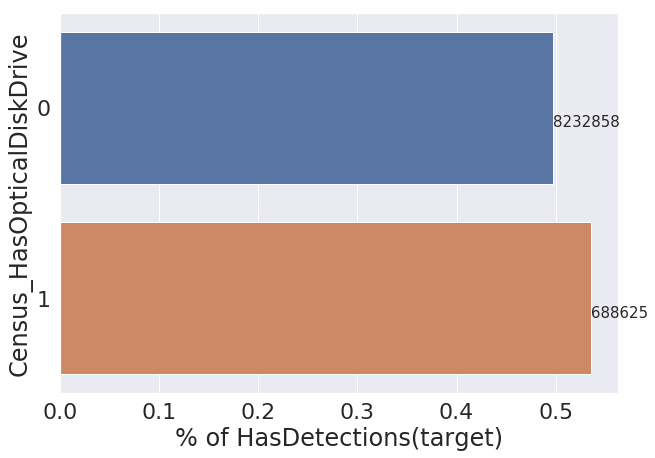

In [60]:
plot_category_percent_of_target(train, 'Census_HasOpticalDiskDrive')

## Census_TotalPhysicalRAM

Retrieves the physical RAM in MB

 **Examples:** 
 - 4096
 - 1024
 - 8192

**Unique:** 3,446

**Percentage Missing:** 0.9%

**Percentage Same:** 45.9%

**Decision**: 
 - cast to int?
 - Create "HighRam" dummy variable?

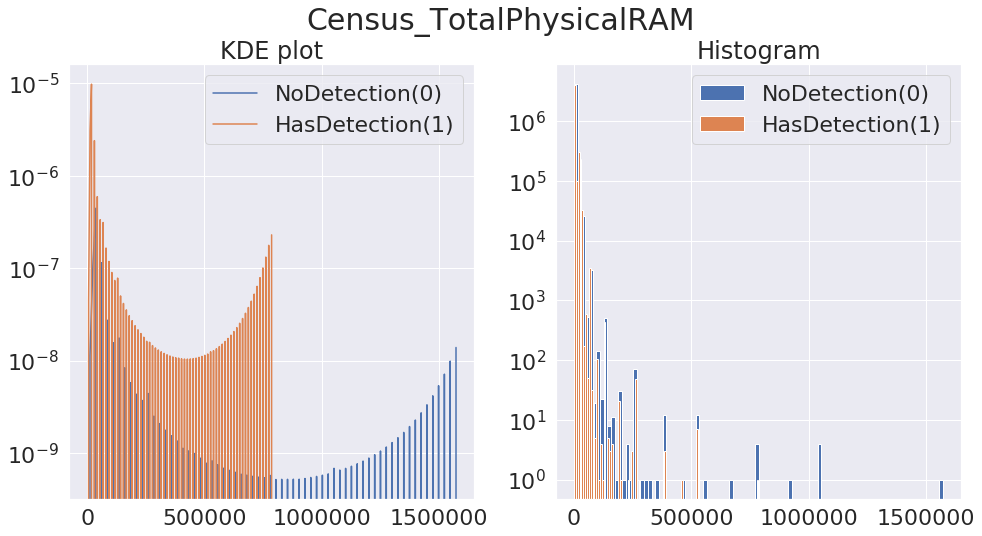

In [62]:
plot_kde_hist_for_numeric(train, 'Census_TotalPhysicalRAM')

## Census_ChassisTypeName

Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx

**NOTE:** Seems similar to `Census_MDC2FormFactor`

 **Examples:** 
 - Notebook
 - Laptop
 - Tablet

**Unique:** 52
 
**Percentage Missing:** 0.007%

**Percentage Same:** 58.83%

**Decision**: 
 - fillna
 - Put NA, UNKOWN and Unknown together.
 - Categorize, threshold categories with less than 50 items into "Other" category

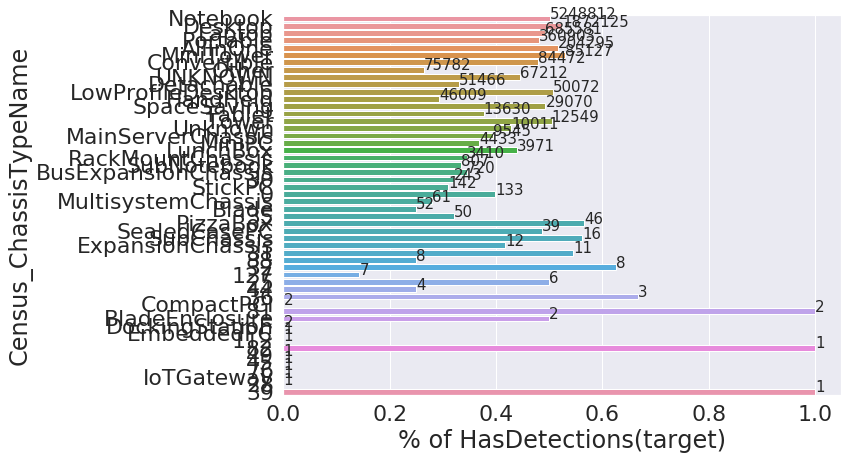

In [65]:
plot_category_percent_of_target(train, 'Census_ChassisTypeName', 52)

## Census_InternalPrimaryDiagonalDisplaySizeInInches

Retrieves the physical diagonal length in inches of the primary display

 **Examples:** 
 - 15.5
 - 15.601562
 - 81.5

**Unique:** 785
 
**Percentage Missing:**  0.52%

**Percentage Same:** 34.2%

**Decision**: 
 - fillna?
 - Leave as numerical float
 - Create IsHighDiagonalDisplaySizeInInches? Seems like high counts have high detections.


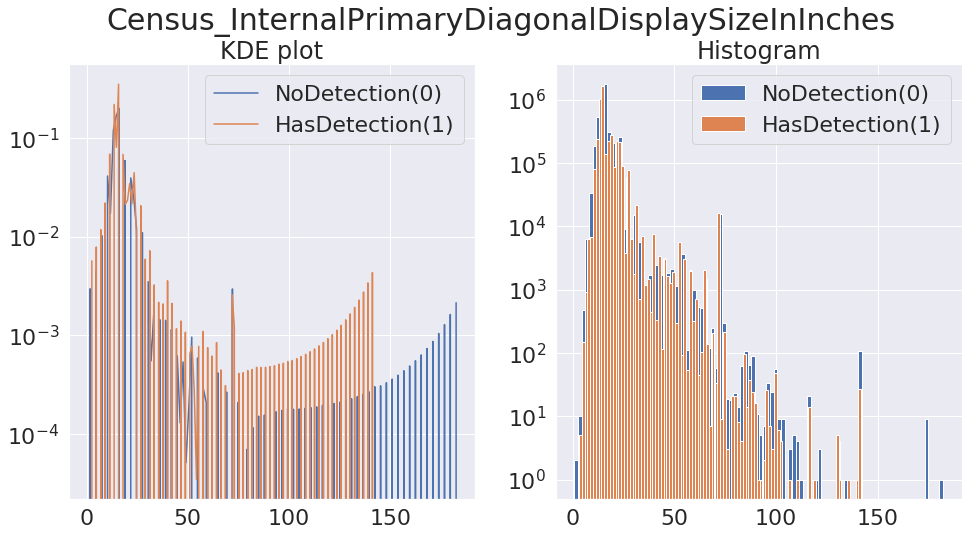

In [68]:
plot_kde_hist_for_numeric(train, 'Census_InternalPrimaryDiagonalDisplaySizeInInches')

## Census_InternalPrimaryDisplayResolutionHorizontal

Retrieves the number of pixels in the horizontal direction of the internal display.

 **Examples:** 
 - 1366
 - 3200
 - 2764

**Unique:** 2050
 
**Percentage Missing:**  0.53%

**Percentage Same:** 50.6%

**Decision**: 
 - fillna?
 - Leave as numerical float

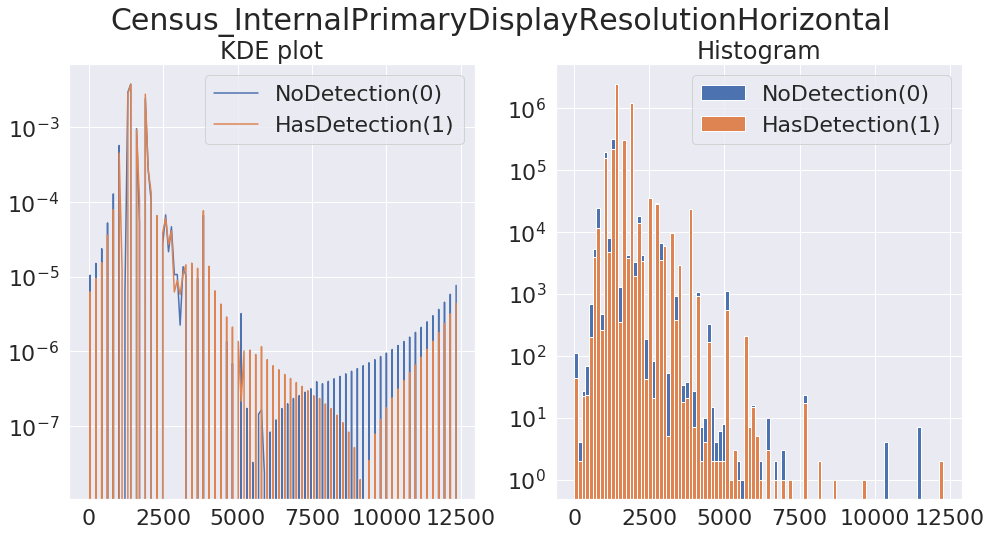

In [72]:
plot_kde_hist_for_numeric(train, 'Census_InternalPrimaryDisplayResolutionHorizontal')

## Census_InternalPrimaryDisplayResolutionVertical

Retrieves the number of pixels in the vertical direction of the internal display

 **Examples:** 
 - 768.0
 - 1080.0
 - 1024.0

**Unique:** 1552
 
**Percentage Missing:** 0.53%

**Percentage Same:** 55.7%

**Decision**: 
 - fillna?
 - Leave as numerical float
 - Create dummy variable ratio with horizontal display resolution?

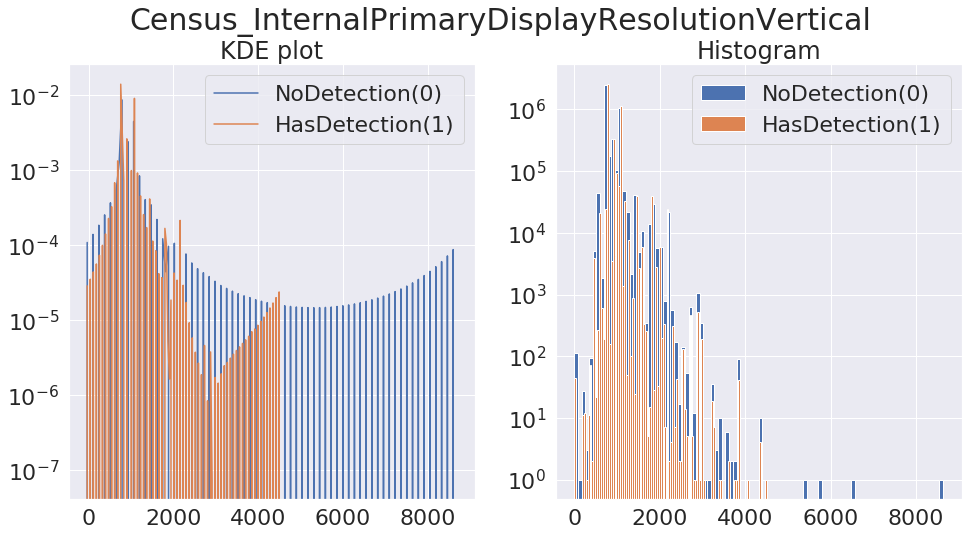

In [75]:
plot_kde_hist_for_numeric(train, 'Census_InternalPrimaryDisplayResolutionVertical')

## Census_PowerPlatformRoleName

Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device.

 **Examples:** 
 - Mobile
 - Desktop
 - Slate

**Unique:** 10
 
**Percentage Missing:** 0.0006%

**Percentage Same:** 69.3%

**Decision**: 
 - fillna
 - Combine UNKNOWN and Unspecified

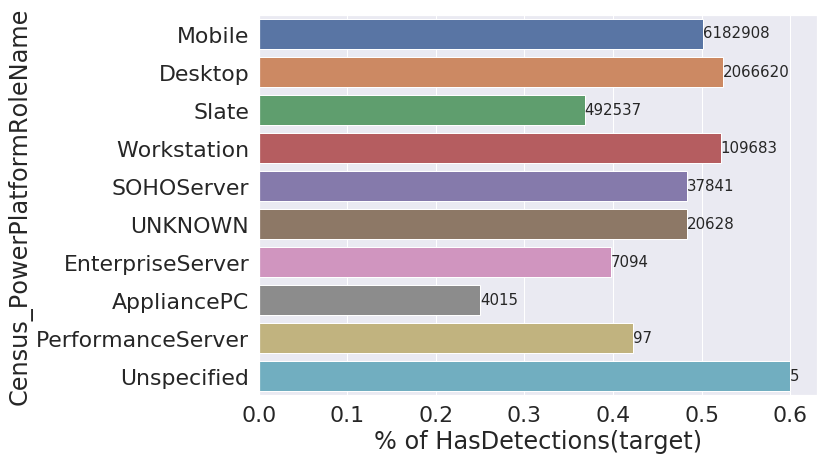

In [77]:
plot_category_percent_of_target(train, 'Census_PowerPlatformRoleName')

## Census_InternalBatteryType

*No description available.*

 **Examples:** 
 - lion
 - lgi0
 - nimh

**Unique:** 78
 
**Percentage Missing:** 71.0%

**Percentage Same:** 71.0%

**Decision**: 
 - fillna
 - Drop. I can't imagine that the battery would impact whether or not a computer gets a virus.
 - Create `HasBattery` category? See whether that impacts anything?
 

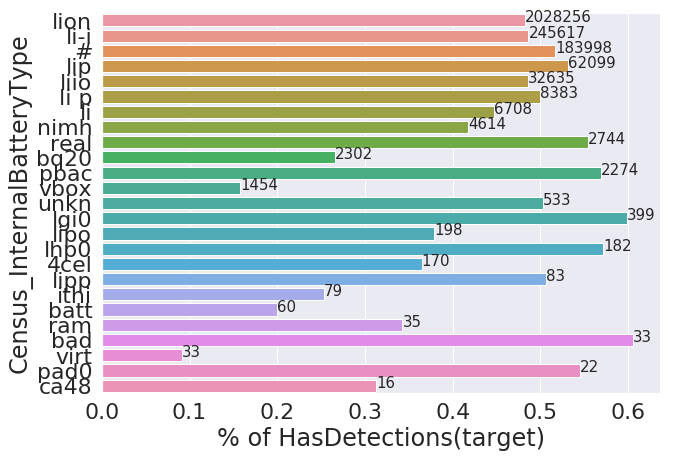

In [81]:
plot_category_percent_of_target(train, 'Census_InternalBatteryType', 25)

## Census_InternalBatteryNumberOfCharges

*No description available.*

 **Examples:** 
 - 0
 - 1.0
 - 33.3

**Unique:** 41,087
 
**Percentage Missing:** 3.0%

**Percentage Same:** 56.64%

**Decision**: 
 - If we use this we need to bucket the counts. Maybe categorize into "No battery", "Few charges", "Many charges"
 - Drop? This tells us age of the computer, maybe that has predictive power?
 

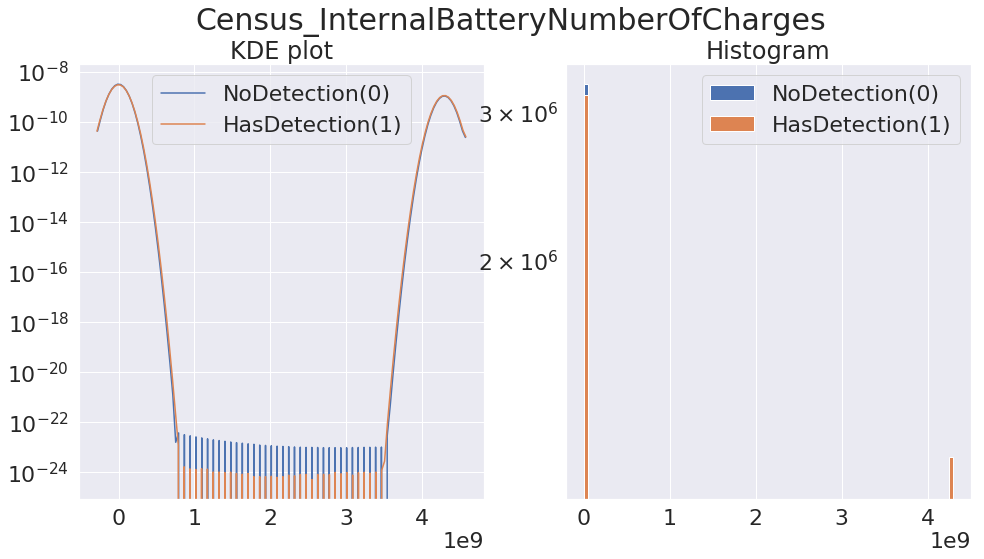

In [84]:
plot_kde_hist_for_numeric(train, 'Census_InternalBatteryNumberOfCharges')

## Census_OSVersion

Numeric OS version Example - `10.0.10130.0`

**Examples:** 
 - 10.0.10586.1176
 - 10.0.16299.547
 - 10.0.17134.228
 - 6.1.7601.24149

**Unique:** 469
 
**Percentage Missing:** 0%

**Percentage Same:** 15.8%

**Decision**: 
 - Should we split the versions and categorize based on each individual version? 
 - Any version in test that aren't in train?
 

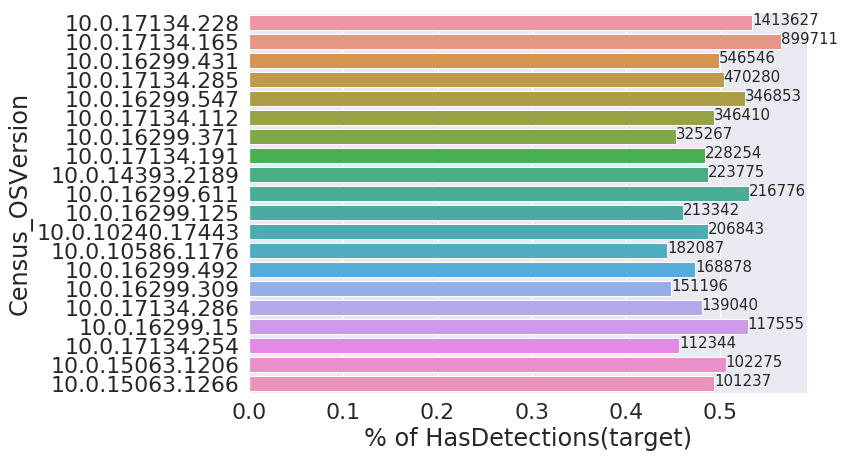

In [86]:
plot_category_percent_of_target(train, 'Census_OSVersion')

## Census_OSArchitecture

Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64

**Examples:** 
 - 
 - 
 - 

**Unique:** 
 
**Percentage Missing:**

**Percentage Same:** 

**Decision**: 
 - 
 

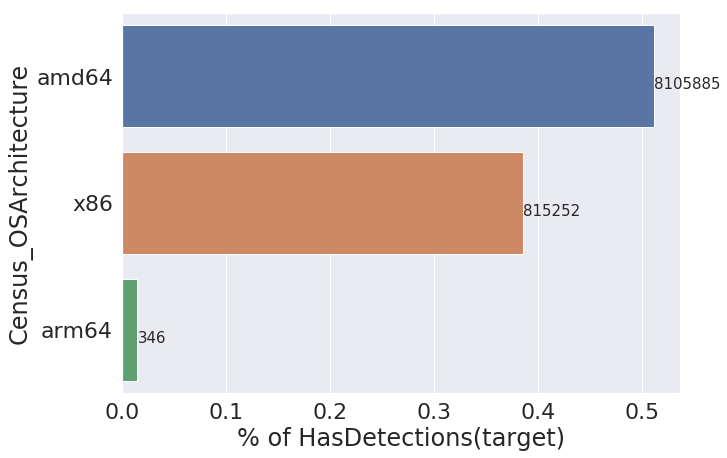

In [91]:
plot_category_percent_of_target(train, 'Census_OSArchitecture')